<a href="https://colab.research.google.com/github/Awaistolu/Machine-learning-projects/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from wordcloud import WordCloud

In [75]:
df = pd.read_csv('/content/train.csv')

In [76]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [77]:
df.shape

(20800, 5)

In [78]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [79]:
df.fillna('',inplace=True)

In [80]:
df['content'] = df['author'] + ' ' + df['title']

In [81]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


1    10413
0    10387
Name: label, dtype: int64


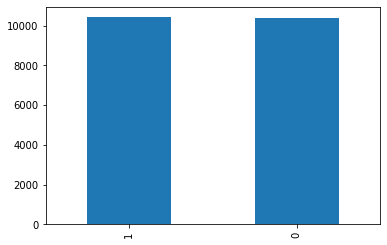

In [82]:
df['label'].value_counts().plot(kind='bar')
print(df['label'].value_counts())

In [83]:
nltk.download('stopwords')
nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [84]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [85]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [86]:
def stemming(text):
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text = nltk.word_tokenize(text)
  stem_text = [ps.stem(word) for word in text if word not in set(stopwords.words('english')) and word not in set(string.punctuation)]
  stem_text = ' '.join(stem_text)
  return stem_text


In [87]:
x = df.drop(columns=['id','label'])
y = df.loc[:,['label']]

In [88]:
x['content'] = x['content'].apply(stemming)

In [89]:
x['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [90]:
tfidf = TfidfVectorizer()
tfidf.fit(x['content'])
X = tfidf.transform(x['content']).toarray()

In [91]:
X.shape

(20800, 17125)

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [93]:
# LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('-'*50)
print(accuracy_score(y_test,y_pred))
print('-'*50)
print(confusion_matrix(y_test,y_pred))
print('-'*50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------------------------------------------------
0.975
--------------------------------------------------
[[1969   91]
 [  13 2087]]
--------------------------------------------------


In [94]:
for i in range(0,10):
  pred = model.predict(x_test)[i]
  if pred == 0:
    print('this news is real')
  else:
    print('fake news')

fake news
this news is real
this news is real
fake news
this news is real
fake news
fake news
fake news
this news is real
fake news


In [95]:
# PassiveAggressiveClassifier
model2 = PassiveAggressiveClassifier(max_iter=50)
model2.fit(x_train,y_train)
y_pred1 = model2.predict(x_test)
print('-'*50)
print(accuracy_score(y_test,y_pred1))
print('-'*50)
print(confusion_matrix(y_test,y_pred1))
print('-'*50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------------------------------------------------
0.9901442307692307
--------------------------------------------------
[[2036   24]
 [  17 2083]]
--------------------------------------------------


In [96]:
for i in range(0,10):
  pred = model2.predict(x_test)[i]
  if pred == 0:
    print('this news is real')
  else:
    print('fake news')

fake news
this news is real
this news is real
fake news
this news is real
fake news
fake news
fake news
this news is real
fake news
